In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


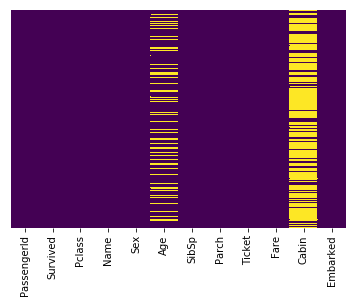

In [9]:
#checando o estado do dataset (NaN values) - td em amarelo são NaNs, visivelmente Cabin é uma coluna inutilizável (drop). 
#Age os valores faltantes podem ser substituidos por médias das idades de acordo com o tipo de cabine por exemplo (mais abaixo solução)

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
sns.set_style('whitegrid')

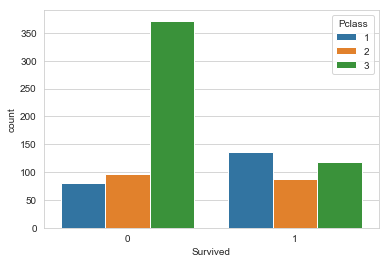

In [16]:
#gráfico mostrando relação entre a Classe de cabine (1, 2 ou 3) e o fato de ter sobrevivido a tragédia ou não

sns.countplot(x='Survived', hue='Pclass', data=train)

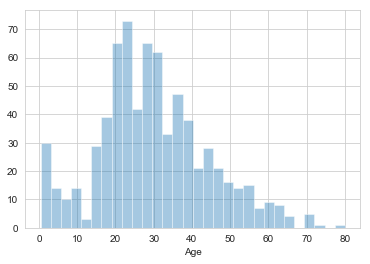

In [17]:
#histograma quantidade de passageiros X idade dos mesmos

sns.distplot(train['Age'].dropna(), kde=False, bins=30)

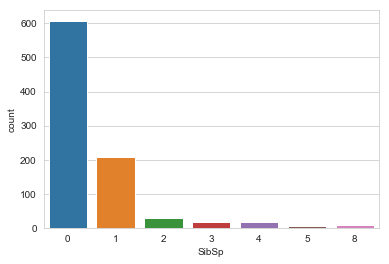

In [20]:
sns.countplot(x='SibSp', data=train)

C:\Users\Grabriel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


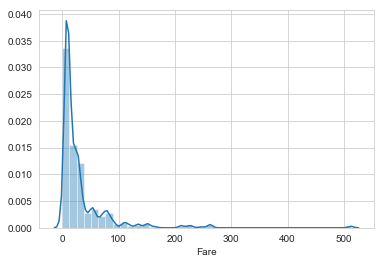

In [22]:
sns.distplot(train['Fare'], bins=40)

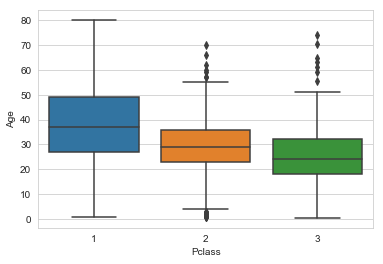

In [23]:
#gráfico mostrando relação entre a Classe de cabine (1, 2 ou 3) e idades.

sns.boxplot(x='Pclass', y='Age', data=train)

In [26]:
#função preenchendo as colunas de idade faltantes. O dataset é pequeno, portanto as médias foram calculadas a parte e
#inseridas na função abaixo. No caso de um dataset maior poderia-se incluir o calculo de tal média na própria função abaixo.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [27]:
#"applying" a função acima nas colunas Age e PClass do dataset

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

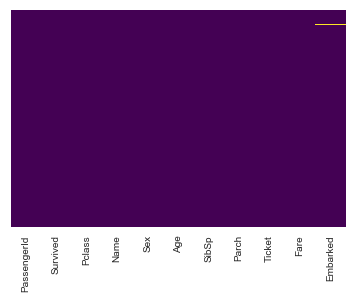

In [44]:
#dados limpinhos! :)

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [45]:
train.dropna(inplace=True)

In [48]:
#transformando as colunas Sex e Embarked (classificação binária, masc/fem, sim/nao, etc) em dummies (0 não, 1 sim por exemplo)

sex = pd.get_dummies(train['Sex'], drop_first=True)

In [50]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [51]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [52]:
#adicionando as colunas dummies ao dataset 

train = pd.concat([train, sex, embark], axis=1)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [57]:
#retirando passengerID (inutil, só causa barulho no dataset). Foram retiradas também: Name, Ticket, Sex e embarked
#(nesses 2 ultimos casos existem dummies substitutos)

train.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

In [58]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [59]:
#hora de treinar o modelo de regreção logistica! Y sempre é o alvo que ser quer "prever"

X = train.drop('Survived', axis=1)
y = train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# fatiando os dados para treino e teste 
# (test_size = seta o % do total do dataset que sera usado no fatiamento, random_state= opcional)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel= LogisticRegression()

In [64]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
#fazendo predição

predictions = logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report

In [67]:
#classification report e confusion matrix == modelo treinado/dados reais X predições. Precisão de 80% em prever se um passageiro
#do Titanic sobreviveu (Survived) a tragédia baseado em: Pclass (classe de viagem),Age (idade), SibSp (acompanhantes), etc 

print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
#confusion matrix! O acima é um "relatório" do abaixo. Há PNGs de confusion matrix neste mesmo repo!

print(confusion_matrix(y_test, predictions))

[[148  15]
 [ 36  68]]
